<!---
Latex Macros
-->
$$
\newcommand{\bar}{\,|\,}
\newcommand{\Xs}{\mathcal{X}}
\newcommand{\Ys}{\mathcal{Y}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\weights}{\mathbf{w}}
\newcommand{\balpha}{\boldsymbol{\alpha}}
\newcommand{\bbeta}{\boldsymbol{\beta}}
\newcommand{\aligns}{\mathbf{a}}
\newcommand{\align}{a}
\newcommand{\source}{\mathbf{s}}
\newcommand{\target}{\mathbf{t}}
\newcommand{\ssource}{s}
\newcommand{\starget}{t}
\newcommand{\repr}{\mathbf{f}}
\newcommand{\repry}{\mathbf{g}}
\newcommand{\x}{\mathbf{x}}
\newcommand{\prob}{p}
\newcommand{\vocab}{V}
\newcommand{\params}{\boldsymbol{\theta}}
\newcommand{\param}{\theta}
\DeclareMathOperator{\perplexity}{PP}
\DeclareMathOperator{\argmax}{argmax}
\DeclareMathOperator{\argmin}{argmin}
\newcommand{\train}{\mathcal{D}}
\newcommand{\counts}[2]{\#_{#1}(#2) }
\newcommand{\length}[1]{\text{length}(#1) }
\newcommand{\indi}{\mathbb{I}}
$$





# Assignment 3




## Introduction

In the last assignment, you will apply deep learning methods to solve a particular story understanding problem. Automatic understanding of stories is an important task in natural language understanding [[1]](http://anthology.aclweb.org/D/D13/D13-1020.pdf). Specifically, you will develop a model that given a sequence of sentences learns to sort these sentence in order to yield a coherent story [[2]](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/06/short-commonsense-stories.pdf). This sounds (and to an extent is) trivial for humans, however it is quite a difficult task for machines as it involves commonsense knowledge and temporal understanding.

## Goal

You are given a dataset of 45502 instances, each consisting of 5 sentences. Your system needs to ouput a sequence of numbers which represent the predicted order of these sentences. For example, given a story:

    He went to the store.
    He found a lamp he liked.
    He bought the lamp.
    Jan decided to get a new lamp.
    Jan's lamp broke.

your system needs to provide an answer in the following form:

    2	3	4	1	0

where the numbers correspond to the zero-based index of each sentence in the correctly ordered story. So "`2`" for "`He went to the store.`" means that this sentence should come 3rd in the correctly ordered target story. In this particular example, this order of indices corresponds to the following target story:

    Jan's lamp broke.
    Jan decided to get a new lamp.
    He went to the store.
    He found a lamp he liked.
    He bought the lamp.

## Resources

To develop your model(s), we provide a training and a development datasets. The test dataset will be held out, and we will use it to evaluate your models. The test set is coming from the same task distribution, and you don't need to expect drastic changes in it.

You will use [TensorFlow](https://www.tensorflow.org/) to build a deep learning model for the task. We provide a very crude system which solves the task with a low accuracy, and a set of additional functions you will have to use to save and load the model you create so that we can run it.

As we have to run the notebooks of each submission, and as deep learning models take long time to train, your notebook **NEEDS** to conform to the following requirements:
* You **NEED** to run your parameter optimisation offline, and provide your final model saved by using the provided function
* The maximum size of a zip file you can upload to moodle is 160MB. We will **NOT** allow submissions larger than that.
* We do not have time to train your models from scratch! You **NEED** to provide the full code you used for the training of your model, but by all means you **CANNOT** call the training method in the notebook you will send to us.
* We will run these notebooks automatically. If your notebook runs the training procedure, in addition to loading the model, and we need to edit your code to stop the training, you will be penalised with **-20 points**.
* If you do not provide a pretrained model, and rely on training your model on our machines, you will get **0 points**.
* Your submissions will be tested on the stat-nlp-book Docker image to ensure that it does not have any dependencies outside of those that we provide. If your submission fails to adhere to this requirement, you will get **0 points**.

Running time and memory issues:
* We have tested a possible solution on a mid-2014 MacBook Pro, and a few epochs of the model run in less than 3min. Thus it is possible to train a model on the data in reasonable time. However, be aware that you will need to run these models many times over, for a larger number of epochs (more elaborate models, trained on much larger datasets can train for weeks! However, this shouldn't be the case here.). If you find training times too long for your development cycle you can reduce the training set size. Once you have found a good solution you can increase the size again. Caveat: model parameters tuned on a smaller dataset may not be optimal for a larger training set.
* In addition to this, as your submission is capped by size, feel free to experiment with different model sizes, numeric values of different precisions, filtering the vocabulary size, downscaling some vectors, etc.

## Hints

A non-exhaustive list of things you might want to give a try:
- better tokenization
- experiment with pre-trained word representations such as [word2vec](https://code.google.com/archive/p/word2vec/), or [GloVe](http://nlp.stanford.edu/projects/glove/). Be aware that these representations might take a lot of parameters in your model. Be sure you use only the words you expect in the training/dev set and account for OOV words. When saving the model parameters, pre-rained word embeddings can simply be used in the word embedding matrix of your model. As said, make sure that this word embedding matrix does not contain all of word2vec or GloVe. Your submission is limited, and we will not allow uploading nor using the whole representations set (up to 3GB!)
- reduced sizes of word representations
- bucketing and batching (our implementation is deliberately not a good one!)
  - make sure to draw random batches from the data! (we do not provide this in our code!)
- better models:
  - stacked RNNs (see tf.contrib.rnn.MultiRNNCell)
  - bi-directional RNNs
  - attention
  - word-by-word attention
  - conditional encoding
  - get model inspirations from papers on [nlp.stanford.edu/projects/snli/](nlp.stanford.edu/projects/snli/)
  - sequence-to-sequence encoder-decode architecture for producing the right ordering
- better training procedure:
  - different training algorithms
  - dropout on the input and output embeddings (see tf.nn.dropout)
  - L2 regularization (see tf.nn.l2_loss)
  - gradient clipping (see tf.clip_by_value or tf.clip_by_norm)
- model selection:
  - early stopping
- hyper-parameter optimization (e.g. random search or grid search (expensive!))
    - initial learning rate
    - dropout probability
    - input and output size
    - L2 regularization
    - gradient clipping value
    - batch size
    - ...
- post-processing
  - for incorporating consistency constraints

## Setup Instructions
It is important that this file is placed in the **correct directory**. It will not run otherwise. The correct directory is

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment3/problem/group_X/
    
where `DIRECTORY_OF_YOUR_BOOK` is a placeholder for the directory you downloaded the book to, and in `X` in `group_X` contains the number of your group.

After you placed it there, **rename the notebook file** to `group_X.ipynb`.

The notebook is pre-set to save models in

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment3/problem/group_X/model/

Be sure not to tinker with that directory - we expect your submission to contain a `model` subdirectory with a single saved model! 
The saving procedure might overwrite the latest save, or not. Make sure you understand what it does, and upload only a single model! (for more details check tf.train.Saver)

## General Instructions
This notebook will be used by you to provide your solution, and by us to both assess your solution and enter your marks. It contains three types of sections:

1. **Setup** Sections: these sections set up code and resources for assessment. **Do not edit, move nor copy these cells**.
2. **Assessment** Sections: these sections are used for both evaluating the output of your code, and for markers to enter their marks. **Do not edit, move, nor copy these cells**.
3. **Task** Sections: these sections require your solutions. They may contain stub code, and you are expected to edit this code. For free text answers simply edit the markdown field.  

**If you edit, move or copy any of the setup, assessments and mark cells, you will be penalised with -20 points**.

Note that you are free to **create additional notebook cells** within a task section. 

Please **do not share** this assignment nor the dataset publicly, by uploading it online, emailing it to friends etc.

## Submission Instructions

To submit your solution:

* Make sure that your solution is fully contained in this notebook. Make sure you do not use any additional files other than your saved model.
* Make sure that your solution runs linearly from start to end (no execution hops). We will run your notebook in that order.
* **Before you submit, make sure your submission is tested on the stat-nlp-book Docker setup to ensure that it does not have any dependencies outside of those that we provide. If your submission fails to adhere to this requirement, you will get 0 points**.
* **If running your notebook produces a trivially fixable error that we spot, we will correct it and penalise you with -20 points. Otherwise you will get 0 points for that solution.**
* **Rename this notebook to your `group_X`** (where `X` is the number of your group), and adhere to the directory structure requirements, if you have not already done so. ** Failure to do so will result in -1 point.**
* Download the notebook in Jupyter via *File -> Download as -> Notebook (.ipynb)*.
* Your submission should be a zip file containing the `group_X` directory, containing `group_X.ipynb` notebook, and the `model` directory with the saved model
* Upload that file to the Moodle submission site.

## <font color='green'>Setup 1</font>: Load Libraries
This cell loads libraries important for evaluation and assessment of your model. **Do not change, move or copy it.**

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib inline
#! SETUP 1 - DO NOT CHANGE, MOVE NOR COPY
import sys, os
_snlp_book_dir = "../../../../../"
sys.path.append(_snlp_book_dir)
# docker image contains tensorflow 0.10.0rc0. We will support execution of only that version!
import statnlpbook.nn as nn

import tensorflow as tf
import numpy as np

## <font color='green'>Setup 2</font>: Load Training Data

This cell loads the training data. **Do not edit the next cell, nor copy/duplicate it**. Instead refer to the variables in your own code, and slice and dice them as you see fit (but do not change their values). 
For example, no one stops you from introducing, in the corresponding task section, `my_train` and `my_dev` variables that split the data into different folds.   

In [2]:
#! SETUP 2 - DO NOT CHANGE, MOVE NOR COPY
data_path = _snlp_book_dir + "data/nn/"
data_train = nn.load_corpus(data_path + "train.tsv")
data_dev = nn.load_corpus(data_path + "dev.tsv")
assert(len(data_train) == 45502)

### Data Structures

Notice that the data is loaded from tab-separated files. The files are easy to read, and we provide the loading functions that load it into a simple data structure. Feel free to check details of the loading.

The data structure at hand is an array of dictionaries, each containing a `story` and the `order` entry. `story` is a list of strings, and `order` is a list of integer indices:

In [3]:
data_train[0]

{'order': [3, 2, 1, 0, 4],
 'story': ['His parents understood and decided to make a change.',
  'The doctors told his parents it was unhealthy.',
  'Dan was overweight as well.',
  "Dan's parents were overweight.",
  'They got themselves and Dan on a diet.']}

## <font color='blue'>Task 1</font>: Model implementation

Your primary task in this assignment is to implement a model that produces the right order of the sentences in the dataset.

### Preprocessing pipeline

First, we construct a preprocessing pipeline, in our case `pipeline` function which takes care of:
- out-of-vocabulary words
- building a vocabulary (on the train set), and applying the same unaltered vocabulary on other sets (dev and test)
- making sure that the length of input is the same for the train and dev/test sets (for fixed-sized models)

You are free (and encouraged!) to do your own input processing function. Should you experiment with recurrent neural networks, you will find that you will need to do so.

You need to make sure that the `pipeline` function returns the necessary data for your computational graph feed - the required inputs in this case, as we will call this function to process your dev and test data. If you do not make sure that the same pipeline applied to the train set is applied to other datasets, your model may not work with that data!

You can take a look at the result of the `pipeline` with the `show_data_instance` function to make sure that your data loaded correctly:

In [4]:
#IMPORTS
import pickle
from sklearn.decomposition import PCA
import statnlpbook.util as util
from collections import defaultdict

In [5]:
#Global Variables
PAD_TOKEN = '<PAD>'
OOV_TOKEN = '<OOV>'

In [6]:
###############        Utilities API         #################
#  Any generic utility functions should go here
##############################################################

In [7]:
# enables tensorboard to visualize the graph later
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [8]:
def pickleSave(dictionary, output_name):
    pickle_out = open("{}.pickle".format(output_name),"wb")
    pickle.dump(dictionary, pickle_out)
    pickle_out.close()

In [9]:
def pickleLoad(file_name):
    return pickle.load( open( file_name, "rb" ) )

In [10]:
def readAndDumpCSV(txtfile,output_name,save=True):
    ''''
    Read a txt file in csv format (tested with glove) and save a python dictionary of the embeddings using pickle
    Also return said dictionary
    '''
    mydict = {}
    with open(txtfile,'r') as f:
        for line in f:
            mydict[line.split(' ')[0]] = np.array([float(n) for n in line.split(' ')[1:]])
        if(save):
                pickle_out = open("{}.pickle".format(output_name),"wb")
                pickle.dump(mydict, pickle_out)
                pickle_out.close()
        else:
            return mydict            

In [11]:
def displayDict(dictionary, num_vals):
    '''
    Display the first num_vals entries of a dictionary
    '''
    count = 0
    for key,val in dictionary.items():
        if(count>num_vals):
            return
        print("key : {} , val : \n {} and the datatypes are: \n key -> {} and val -> {}\n".format(key,val,type(key) ,type(val)))
        count+=1

In [12]:
#Early stopper class:
# Logic:
#  After each epoch of training, compare the dev accuracy with the max dev accuracy  achieved
#  If it is bigger, replace it, save the model, reset the decreasing accuracy count and continue
#  If it is smaller, 
#    Check whether the patience count is equal to teh number of consecutive decreasing accuracies
#       if yes:  Trigger early stopping (Flag to break off the training loop)
#       if no : add 1 to the count of consecutive decreasing accuracies and continue
#  After training, the model saved needs to be reloaded, as this will be the last model where the accuracy increased

class EarlyStopper(object):
    '''
    Early stopper class: after each epoch of training assess whether the accuracy on the dev-set is smaller
    than the accuracy on the dev set on the previous epoch.
    If this is not the case for a patience number of epochs, stop the training and keep the model of the last
    epoch where the accuracy increased
    '''
    def __init__(self, patience, verbose):
        '''
        patience : after how many epochs of decreasing dev accuracy do we stop
        '''
        self.patience = patience
        self.decreasing_epochs = 0
        self.last_increasing_accuracy = 0.0
        self.verbose = verbose
        
    def checkEarlyStopping(self,dev_accuracy, session):
        
        if(dev_accuracy > self.last_increasing_accuracy):
            if(self.verbose):
                print("Accuracy Increasing in the dev set, saving the model!")
            nn.save_model(session)
            self.last_increasing_accuracy = dev_accuracy 
            self.decreasing_epochs = 0
            return False
        else:
            self.decreasing_epochs+=1
            if(self.decreasing_epochs >= self.patience):
                print("Early stopping activated : {} consecutive epochs where accuracy is decresing!".format(self.decreasing_epochs))
                print("Model saved yields a dev set accuracy of : {}".format(self.last_increasing_accuracy))
                return True
            else:
                if(self.verbose):
                    print("Accuracy decreasing on the Dev set, taking note and continuing!")
                return False

In [13]:
def findWord(token,vocab):
    for key,item in vocab.items():
        if (token == item):
            return key
    raise ValueError("Word in phrase not in the vocab")

In [14]:
###############        Utilities API  END       #################
##############################################################

In [15]:
###############        ERROR ANALYSIS API       ###############
##############################################################

In [16]:
def create_confusion_matrix(data, predictions):
    confusion = defaultdict(int)
    for y_true, y_guess in zip(data, predictions):
        for order_true , order_guess in zip(y_true,y_guess):
            confusion[(order_true, order_guess)] += 1
    return confusion

In [100]:
def create_confusion_matrix_for_sentence(data,predictions,sentence):
    confusion = defaultdict(int)
    for y_true, y_guess in zip(data, predictions):
        confusion[(y_true[sentence], y_guess[sentence])] += 1
    return confusion

In [17]:
def getErrors(data, true_orders, predicted_orders):
    errorsList = []
    list_index = 0
    for order_true, order_guess in zip(true_orders, predicted_orders):
        if (not np.all(order_true == order_guess)):
            story = data[list_index]['story']
            true_paragraph = [None]*5
            count =0
            for i in order_true:
                true_paragraph[i]=story[count]
                count +=1
            
            predicted_paragraph =[None]*5
            count =0
            for i in order_guess:
                predicted_paragraph[i]=story[count]
                count+=1
                
            error = {"index": list_index,
                     "true_order": order_true,
                     'predicted_order':order_guess,
                    'true_paragraph':true_paragraph,
                    'predicted_paragraph':predicted_paragraph}
            errorsList.append(error)
        list_index+=1
    return errorsList

In [18]:
def displayErrors(errorsList, numToDisp):
    for error in errorsList[:numToDisp]:
        print("---------------------------------------------------------------------------")
        print("### The correct order is : ###")

        for phrase in error["true_paragraph"]:
            print(phrase)
        
        print("\n ### The predicted order was : ###")
        for phrase in error["predicted_paragraph"]:
            print(phrase)
        print("---------------------------------------------------------------------------- \n")
            

In [19]:
def getPADandOOVHistogramsOnErrors(errors,stories):
    stats = {}
    stats['PAD_hist'] = defaultdict(float)
    stats['OOV_hist'] = defaultdict(float)
    for error in errors:
        phrase_index = 0 
        for true_pos,pred_pos in zip(error['true_order'],error['predicted_order']):
            if(true_pos != pred_pos):
                story_index = error['index']
                phrase = stories[story_index][phrase_index]
                pad_nb = np.count_nonzero(phrase==0)
                oov_nb = np.count_nonzero(phrase==1)
                stats['PAD_hist'][pad_nb]+=1.0
                stats['OOV_hist'][oov_nb]+=1.0
            phrase_index+=1
        
    return stats
    

In [20]:
def plot_histogram(stats,interest,sorting_param=0):
    
    values =[]
    labels = []
    
    histItems =[]
    for key,value in stats[interest].items():
        histItems.append((key,value))
    
    histItems = sorted(histItems, key=lambda x: x[sorting_param])
   
    for key,value in histItems:
        labels.append(key)
        values.append(value)
        
    util.plot_bar_graph(values, labels)
    

In [21]:
def getFullPadandOOVHistorgrams(stories):
    stats = {}
    stats['PAD_hist'] = defaultdict(float)
    stats['OOV_hist'] = defaultdict(float)
    for story in stories:
        for phrase in story:
            pad_nb = np.count_nonzero(phrase==0)
            oov_nb = np.count_nonzero(phrase==1)
            stats['PAD_hist'][pad_nb]+=1.0
            stats['OOV_hist'][oov_nb]+=1.0

        
    return stats

In [22]:
def getErrorWordFrequency(errors,stories,vocab):
    word_frequency = defaultdict(float)
    for error in errors:
        phrase_index = 0 
        for true_pos,pred_pos in zip(error['true_order'],error['predicted_order']):
            if(true_pos != pred_pos):
                story_index = error['index']
                phrase = stories[story_index][phrase_index]
                for word in phrase:
                    word_str = findWord(word,vocab)
                    word_frequency[word_str]+=1.0
        
    return word_frequency

In [23]:
def plot_word_histogram(word_freq,num_displayed,values_ignored):
    
    values =[]
    labels = []
    
    histItems =[]
    count = 0
    for key,value in word_freq.items():
        if(count>=num_displayed):
            break
        if(key not in values_ignored):
            histItems.append((key,value))
            count+=1
    
    histItems = sorted(histItems, key=lambda x: -x[1])
   
    for key,value in histItems:
        labels.append(key)
        values.append(value)
        
    util.plot_bar_graph(values, labels)

In [24]:
def getWordFrequency(stories,vocab):
    word_frequency = defaultdict(float)
    for story in stories:
        for phrase in story:
            for word in phrase:
                word_str = findWord(word,vocab)
                word_frequency[word_str]+=1.0
        
    return word_frequency

In [25]:
def freq_ratios(standard_freq,error_freq):
    freq_ratio = defaultdict(float)
    for word in error_freq.keys():
        freq_ratio[word] = error_freq[word]/standard_freq[word]
    return freq_ratio

In [26]:
############           ERROR ANALYSIS API END    ###############
###############################################################

In [27]:
##############           PREPOCESSING API         ######################
#  Here will go all the functions relating to preprocessing
###################################################################

In [28]:
# TODO create tokenizer so it handles the following:
# - (n't 's 'm 're 've 'll 'd) word endings to be separated (shouldn't -> (should, n't))
# - punctuation at the end of sentences (This is a sentence. -> (..., a, sentence, .))
#     - try to make sure if possible to filter out only sentence ending punctuation (U.S. etc. Mr. St.) should be kept
#     - also words like e.g. a.m. p.m.
# - separate numbers from others ($5 -> $, 5)
#
# OR find a library that is included in the docker image (nltk and spacy aren't...) that does that for us
#
# decide what to do with words not in GloVe (random embedding?)

# tokenisation
punctuation = '.,:;?!"'
endings_2 = ["'s", "'m", "'d"]
endings_3 = ["n't", "'re", "'ve", "'ll"]
valid_words = ['e.g.', 'a.m.', 'p.m.', 'U.S.', 'etc.', 'i.e.', 'Mr.', 'Mrs.', 'Ms.', 'St.']
currency = '$€£'

def tokenize_word(word):    
    if len(word) == 1:
        return [word]
    
    if word.isalpha():
        return [word]

    if word in valid_words:
        return [word]
    
    if word[0] in currency or word[0] in punctuation:
        tokens = tokenize_word(word[1:])
        sign = word[0]
        tokens.insert(0, sign)
        return tokens
    
    if word[-1] in punctuation:
        tokens = tokenize_word(word[:-1])
        tokens.append(word[-1])
        return tokens
    
    if len(word) > 2 and word[-2:] in endings_2:
        tokens = tokenize_word(word[:-2])
        tokens.append(word[-2:])
        return tokens
    
    if len(word) > 3 and word[-3:] in endings_3:
        tokens = tokenize_word(word[:-3])
        tokens.append(word[-3:])
        return tokens
    
    return [word]
        
def tokenize_sent(sent):
    sent = sent.split(' ')
    ret = [tokens for word in sent if len(word) > 0 for tokens in tokenize_word(word) ]
    return ret

In [29]:
# preprocessing pipeline, used to load the data intro a structure required by the model
def pipeline(data, vocab=None, max_sent_len_=None):
    is_ext_vocab = True
    if vocab is None:
        is_ext_vocab = False
        vocab = {'<PAD>': 0, '<OOV>': 1}
    
    if is_ext_vocab:
        if 'The' in vocab:
            capitalized = True
        else:
            capitalized = False
    else:
        capitalized = True

    max_sent_len = -1
    data_sentences = []
    data_orders = []
    for instance in data:
        sents = []
        for sentence in instance['story']:
            sent = []
            tokenized = tokenize_sent(sentence)
            for token in tokenized:
                # if we do not use capitalized letters, make the word lowercase
                if not capitalized:
                    token = token.lower()
                
                if not is_ext_vocab and token not in vocab:
                    vocab[token] = len(vocab)
                if token not in vocab:
                    token_id = vocab['<OOV>']
                    #print('NOT IN VOCAB: ' + token)
                else:
                    token_id = vocab[token]
                sent.append(token_id)
            if len(sent) > max_sent_len:
                max_sent_len = len(sent)
            sents.append(sent)
        data_sentences.append(sents)
        data_orders.append(instance['order'])

    if max_sent_len_ is not None:
        max_sent_len = max_sent_len_
    out_sentences = np.full([len(data_sentences), 5, max_sent_len], vocab['<PAD>'], dtype=np.int32)

    for i, elem in enumerate(data_sentences):
        for j, sent in enumerate(elem):
            out_sentences[i, j, 0:len(sent)] = sent

    out_orders = np.array(data_orders, dtype=np.int32)
    
    return out_sentences, out_orders, vocab

In [30]:
def findMeanEmbedding(embeddingDict):
    '''Get the mean embedding and the standard deviation (dimention-wise) from an input embedding dictionary'''
    vectorList = list(embeddingDict.values())
    return np.mean(vectorList,axis=0), np.std(vectorList,axis=0)

In [31]:
####      REMARK    ######
#By taking embeddings from glove that are not in the give vocab, aren't we effectively 
# increasing the length our vocab?????? Because a word not in the vocab that is in the test set will have an 
# embedding ...

# So we have two ways of doing this



#1 :
# Get the N Most popular words in GLOVE to define our VOCAB and embeddings
# Which means that the OOV words in the test set will be the words that are not in the N most popular words
# AND all the words that we give a vector for have meaning (are not random)!

#Then all we need to do is make a tokensation that makes sure to match what the GLOVE tokenisation is to avoid 
#missmatches .



# 2 :
# Using the training set to get a vocab
# finding the embeddings in glove for the words in our vocab
# FOR the words in our vocab THAT DONT have a glove embedding we give a RANDOM value

#Then we are using our vocab to figure out what the oovs are in the test set
#We then extract our embedding which is either the GLOVE value of the word or a RANDOM value
# and use that  for our LSTM



# 1 seems conceptually better to me, but i implemented both we can try, script 1 below  is method 1 and script 2
# is method 2


## THIS IS ILLUSTRATED IN THE TWO PREPROCESSING SCRIPTS BELOW

In [32]:
#Used in 2. in the remark above
def createWordEmbeddings(pre_learned_embeddings,total_size = -1):
    '''
    Using a pre-trained word embeddings dictionary, create our (reduced in size) dictionary of embeddings.
    Make sure that all the words in our vocab are embedded, and also use the embeddings of the most popular words,
    as long as the total_size of the dictionary is not exceeded.
    pre_learned_embeddings : Dictionnary of word embeddings, can come from glove or word2vec
    total_size : Length of our output embeddings dictionary
    Returns : A dictionary of word embeddings
    '''
    
    if(total_size >=len(pre_learned_embeddings)):
        #Undefined behaviour in the above case
        raise ValueError("Total size is too big")
    
    #Get the dimention of the embeddings
    dim = len(pre_learned_embeddings["the"])
    
    #Compute the mean vector and std vector for the glove embeddings
    mean_glove, std_glove = findMeanEmbedding(pre_learned_embeddings)

    #Initialise the embeddings dict
    embeddings = {}
    
    #Iterate over all the words in our vocabulary
    for word, word_index in vocab.items():
        #Stop if we reach our total desired size : 
        #Careful : Will this create bugs with non-embedded words? -> Maybe its better not to allow total_size<vocab_size
        if( total_size > 0 and len(embeddings) >= total_size):
            print("Warning: Total size reached before full vocab was embedded")
            break
            
            
        if(word == PAD_TOKEN):
            #Set the <PAD> token to 0
            embeddings[word_index] = np.zeros(dim)
        elif(word == OOV_TOKEN ):
            #Initialize the <OOV> token to 1. Update later (c.f. below)
            embeddings[word_index] = np.ones(dim)
        elif(word in pre_learned_embeddings):
            #If the word is in the glove dictionnary, use this embedding
            embeddings[word_index] = pre_learned_embeddings[word]
        else:
            #If not, set its embedding to a random vector with
            #mean the average glove embedding and std the std of the glove embeddings
            #TODO : think if there is a better way to assign vectors in our vocab that are not in Glove
            mean_with_white_noise = mean_glove + np.random.rand(dim)*std_glove
            embeddings[word_index] = mean_with_white_noise
            
            
    #Make some more embeddings than the words that are in our vocab:
    #Iterate over the glove Word embeddings
    if(total_size > 0):
        for word, pre_learned_embedding in pre_learned_embeddings.items():
            #If we exceed our total desired length, stop
            if(len(embeddings) >= total_size):
                break

            #Add embeddings that are not already there
            #For this to make sense we also need to increase our vocabulary.
            if(word not in embeddings):
                vocab[word] = len(vocab)
                embeddings[vocab[word]] = pre_learned_embedding 


    #Update the OOV embedding : The idea is to set it the average value of the unused Glove embeddings
    #To do so set the OOV value to the mean of all glove embeddings - mean of our embeddings 
    #ALERT : This mean is corrupted by the noise we are adding in the else clause above and by the embeddings
    # for the <PAD> and <OOV> tokens -> Not sure if we should care or not
    mean_embeddings , std_embeddings = findMeanEmbedding(embeddings)
    OOV_value = mean_glove - mean_embeddings
    embeddings[vocab[OOV_TOKEN]] = OOV_value
    
    return embeddings

In [33]:
#Used in 1 in the remark above
def createWordVocabAndEmbeddings(pre_learned_embeddings, total_size):  
    '''
    Use the total_size first embeddings from pre_learned_embeddings as our vocab and embeddings
    Assign the mean vector of unused embeddings to get the OOV token embedding
    Assign the origin to the PAD token embedding
    '''
    
    if(total_size >=len(pre_learned_embeddings)):
        #Undefined behaviour in the above case
        raise ValueError("Total size is too big")
    
    #Get the dimention of the embeddings
    dim = len(pre_learned_embeddings["the"])
    
    #Compute the mean vector and std vector for the glove embeddings
    mean_glove, std_glove = findMeanEmbedding(pre_learned_embeddings)

    #Initialise the embeddings and vocab dicts
    vocab = {PAD_TOKEN:0, OOV_TOKEN:1}
    embeddings = {0:np.zeros(dim) , 1:np.ones(dim)}
    
    #Create the vocab and embeddings by taking the total_size first tokens in glove
    for word, pre_learned_embedding in pre_learned_embeddings.items():
        if(len(embeddings)>=total_size):
            break
        vocab[word]=len(vocab)
        embeddings[vocab[word]] = pre_learned_embeddings[word]
    
    
    #Update the OOV embedding : The idea is to set it the average value of the unused Glove embeddings
    #To do so set the OOV value to the mean of all glove embeddings - mean of our embeddings 
    mean_embeddings , std_embeddings = findMeanEmbedding(embeddings)
    OOV_value = mean_glove - mean_embeddings
    embeddings[vocab[OOV_TOKEN]] = OOV_value
    
    
    return vocab, embeddings

In [34]:
def doPCA(embeddings, output_dim):
    '''
    Perform PCA on a dictionary of embeddings to return the reduced-dimentionality embeddings with output_dim dimention.
    '''
    #Get a numpy array from the embeddings to perform the PCA
    #Get the input dimentions
    in_dim = len(embeddings[0])
    num_embeddings = len(embeddings)
    #initialise the array:
    # get a dim*num_of_embeddings np array with all the embeddings
    emb = np.zeros((num_embeddings,in_dim))

    #Transfer the embeddings dictionary to the emb array
    for k,v in embeddings.items():
        emb[k,:] = v


    #Perfom PCA using scikit learn
    pca = PCA(n_components = output_dim)
    pca_embeddings = pca.fit_transform(emb)


    #Put the pca-reduced embeddings back into a dictionary
    pca_embeddings_dict = {}
    count = 0
    for embedding in pca_embeddings:
        pca_embeddings_dict[count] = embedding
        count+=1

    #Map the embedding for <PAD> back to 0.
    pca_embeddings_dict[0]=np.zeros(pca_embeddings_dict[1].shape)

    return pca_embeddings_dict


In [35]:
##############      PREPROCESSING API END    #####################
##################################################################

In [36]:
##############      DO PREPROCESSING           ####################
#  In this section put the scripts utilising the functions above to run the pre-processing
###################################################################

In [37]:
### ONLY NEED TO  (AND SHOULD) RUN ONCE: - already on github so not even ###
#Save the glove embeddings into a pickle format 

In [38]:
#readAndDumpCSV("./glove/glove.6B.50d.txt","glove6B50D")

In [39]:
#readAndDumpCSV("./glove/glove.6B.100d.txt","glove6B100D")

In [40]:
#readAndDumpCSV("./glove/glove.6B.200d.txt","glove6B200D")

In [41]:
#readAndDumpCSV("./glove/glove.6B.300d.txt","glove6B300D")

In [42]:
#readAndDumpCSV("./glove/glove.42B.300d.txt","glove42B300D")

In [43]:
#Computer runs out of memory with this one.....
#readAndDumpCSV("./glove/glove.840B.300d.txt" ,"glove840B300D")

In [44]:
### Script hyper parameters!! ###

#Flags
use_pca = False 

#parameters
output_dimention_from_pca = 50
embeddings_file_to_load = "glove6B200D.pickle"
vocab_size = 50000

In [45]:
'''########   Script 1 :   ##########
# Use Glove to define the vocab, and (later on, within the model) train with OOV tokens if need be

# LOAD the Pickle file of pre-trained embeddings : Choose favorite
pre_learned_embeddings = pickleLoad(embeddings_file_to_load)

#Create the vocab and embeddings of desired size
vocab, embeddings = createWordVocabAndEmbeddings(pre_learned_embeddings, vocab_size)

if(use_pca):
    embeddings = doPCA(embeddings,output_dimention_from_pca)


#Get the training data
train_stories, train_orders, _ = pipeline(data_train, vocab)

# get the length of the longest sentence
max_sent_len = train_stories.shape[2]

#Get validation data
dev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_=max_sent_len)

pickleSave(vocab, "VocabScript1")
pickleSave(embeddings, "EmbeddingScript1")

#################################
'''

'########   Script 1 :   ##########\n# Use Glove to define the vocab, and (later on, within the model) train with OOV tokens if need be\n\n# LOAD the Pickle file of pre-trained embeddings : Choose favorite\npre_learned_embeddings = pickleLoad(embeddings_file_to_load)\n\n#Create the vocab and embeddings of desired size\nvocab, embeddings = createWordVocabAndEmbeddings(pre_learned_embeddings, vocab_size)\n\nif(use_pca):\n    embeddings = doPCA(embeddings,output_dimention_from_pca)\n\n\n#Get the training data\ntrain_stories, train_orders, _ = pipeline(data_train, vocab)\n\n# get the length of the longest sentence\nmax_sent_len = train_stories.shape[2]\n\n#Get validation data\ndev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_=max_sent_len)\n\npickleSave(vocab, "VocabScript1")\npickleSave(embeddings, "EmbeddingScript1")\n\n#################################\n'

In [46]:
### Testing version of Script 1 #### 
# Use this in order to load the vocab and embeddings produced and only load them directly when needed
vocab = pickleLoad("VocabScript1.pickle")
embeddings= pickleLoad("EmbeddingScript1.pickle")
#Get the training data
train_stories, train_orders, _ = pipeline(data_train, vocab)

# get the length of the longest sentence
max_sent_len = train_stories.shape[2]

#Get validation data
dev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_=max_sent_len)

In [47]:
########### Script 2 ############ 
# Use the training data to define the vocab, and then try to adapt the Glove embeddings to this vocab

# LOAD the Pickle file of pre-trained embeddings : Choose favorite
#pre_learned_embeddings = pickleLoad(embeddings_file_to_load)


#Get the training data and the vocabulary
#train_stories, train_orders, vocab = pipeline(data_train)

# get the length of the longest sentence
#max_sent_len = train_stories.shape[2]

#Get the word embeddings
#embeddings = createWordEmbeddings(pre_learned_embeddings)

#if(use_pca):
 #   embeddings = doPCA(embeddings,output_dimention_from_pca)

#Get Validation data
#dev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_= max_sent_len)
################################

In [48]:
#displayDict(embeddings,3)

In [49]:
#displayDict(vocab,3)

In [50]:
### OPTIONAL :
# Use this in order to save the vocab and embeddings produced and only load them directly when needed
#pickleSave(vocab, "VocabScript2")
#pickleSave(embeddings, "EmbeddingScript2")

In [51]:
### OPTIONAL:
# If the vocabs and embeddings were saved before can just call this cell

#vocab_file = "VocabScript1.pickle"
#embedding_file = "EmbeddingScript1.pickle"

#vocab = pickleLoad(vocab_file)
#embeddings = pickleLoad(embedding_file)

# get the length of the longest sentence
#max_sent_len = train_stories.shape[2]

#Get Validation data
#dev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_=max_sent_len)

In [52]:
#nn.show_data_instance(dev_stories, dev_orders, vocab, 15)

In [53]:
# ADD NEW TRAINING DATA
def reorder_training_set(train_stories, train_orders):

    new_stories = []
    new_orders = []
    for idx, story in enumerate(train_stories):
        perm = np.random.permutation(5)            
        new_story = story[perm, :]
        new_order = train_orders[idx][perm]
        new_stories.append(new_story)
        new_orders.append(new_order)
        
    return np.array(new_stories), np.array(new_orders)

In [54]:
##############      DO PREPORCESSING END   #####################
##################################################################

### Model

The model we provide is a rudimentary, non-optimised model that essentially represents every word in a sentence with a fixed vector, sums these vectors up (per sentence) and puts a softmax at the end which aims to guess the order of sentences independently.

First we define the model parameters:

In [55]:
 #Imports
from tensorflow.contrib import rnn
from scipy.optimize import linear_sum_assignment
import time

In [107]:
### MODEL PARAMETERS ###
target_size = 5
vocab_size = len(vocab)
input_size = len(embeddings[0])
# n = len(train_stories)
output_size = 5

n_hidden_1 = 64
n_hidden_2 = 32
num_hidden_lstm = 64
sentence_embedding_dim = 128
attention_width = 32
attention_instances = 1
patience = 4

learning_rate = 0.001
clip_norm = 10.0

regularizer = 0.001

SE_methods = ['one_layer_LSTM', 'one_layer_biLSTM', 'two_layer_LSTM', 'two_layer_biLSTM', 'three_layer_LSTM', 'self_attention']
SE_method = 'two_layer_biLSTM' # choose from SE_methods

OPT_methods = ['original', 'hungarian', 'regression']
OPT_method = 'hungarian'

and then we define the model

In [57]:
def inverse_permutation(x, batch_size):
    # x will be a numpy array with the contents of the placeholder below
    y = np.zeros_like(x, dtype=np.int32)
    for b in range(batch_size):
        for i in range(5):
            y[b, x[b, i]] = 4 - i
    return y

In [58]:
def hungarian_method(x, batch_size):
    l = list()
    #print('x={}'.format(x[:3, :]))
    #print('batch_size={}'.format(batch_size))
    
    for b in range(batch_size):
        row_indices, column_indices = linear_sum_assignment(-x[b, :])
        l.append(column_indices)
        
    l = np.array(l, dtype=np.int32)
    #print('l={}'.format(l[:3]))
    return l

In [59]:
def RNN(x, weights, biases, fwd_cell, sent_lens):

    # Get lstm cell output - dynamic_rnn allows for different sequence lengths, sets output to 0 after and just maintains state
    outputs, final_states = tf.nn.dynamic_rnn(fwd_cell, x, dtype=tf.float32, sequence_length=sent_lens)
    
    final_output = final_states[1] # final_states returns a tuple of (final_output, final_state)

    return tf.matmul(final_output, weights) + biases

In [60]:
def BiRNN(x, weights, biases, fwd_cell, bwd_cell, sent_lens):
   
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(fwd_cell, bwd_cell, x, dtype=tf.float32, sequence_length=sent_lens)

    states_concat = tf.concat([final_states[0], final_states[1]], 2) # concatenate the forward pass and backwards pass

    final_output = states_concat[1] # states_concat returns a tuple of (final_context, final_state)

    return tf.matmul(final_output, weights) + biases

In [61]:
def TwoLayerRNN(x, weights, biases, cell1, cell2, sent_lens):
    
    # Get outputs from 1 layer LSTM
    outputs, final_states = tf.nn.dynamic_rnn(cell1, x, dtype=tf.float32, sequence_length=sent_lens, scope='layer1')
    # Use outputs from previous layer as input to LSTM
    outputs, final_states = tf.nn.dynamic_rnn(cell2, outputs, dtype=tf.float32, sequence_length=sent_lens, scope='layer2')
    
    final_output = final_states[1] # final_states returns a tuple of (final_output, final_state); get output only
    
    return tf.matmul(final_output, weights) + biases 
    

In [62]:
def MultiLayerBiRNN(x, weights, biases, fwd_cell1, fwd_cell2, bwd_cell1, bwd_cell2, sent_lens):

    # Get outputs from 1 layer LSTM
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(
       fwd_cell1, bwd_cell1, x, dtype=tf.float32, sequence_length=sent_lens, scope='layer1')

    # Concatenate outputs

    output_concat = tf.concat([outputs[0], outputs[1]], 2)

    # Use outputs from previous layer as input to LSTM
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(
       fwd_cell2, bwd_cell2, output_concat, dtype=tf.float32, sequence_length=sent_lens, scope='layer2')

    states_concat = tf.concat([final_states[0], final_states[1]], 2) # concatenate the forward pass and backwards pass

    final_state = states_concat[1] # get final hidden state, ignore final context

    return tf.matmul(final_state, weights) + biases

In [63]:
def ThreeLayerRNN(x, weights, biases, cell1, cell2, cell3, sent_lens):
    
    # Get outputs from 1 layer LSTM
    outputs, final_states = tf.nn.dynamic_rnn(cell1, x, dtype=tf.float32, sequence_length=sent_lens, scope='layer1')
    # Use outputs from previous layer as input to LSTM
    outputs, final_states = tf.nn.dynamic_rnn(cell2, outputs, dtype=tf.float32, sequence_length=sent_lens, scope='layer2')
    outputs, final_states = tf.nn.dynamic_rnn(cell3, outputs, dtype=tf.float32, sequence_length=sent_lens, scope='layer3')
    
    final_output = final_states[1] # final_states returns a tuple of (final_output, final_state); get output only
    
    return tf.matmul(final_output, weights) + biases 

In [64]:
def SelfAttention(x, weights, biases, fwd_cell1, fwd_cell2, bwd_cell1, bwd_cell2, sent_lens):
    """Implementation of self attention paper https://arxiv.org/pdf/1703.03130.pdf"""
    
        # Get outputs from 1 layer LSTM
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(
       fwd_cell1, bwd_cell1, x, dtype=tf.float32, sequence_length=sent_lens, scope='layer1')

    # Concatenate outputs

    output_concat = tf.concat([outputs[0], outputs[1]], 2)

    # Use outputs from previous layer as input to LSTM
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(
       fwd_cell2, bwd_cell2, output_concat, dtype=tf.float32, sequence_length=sent_lens, scope='layer2')
    
    output_concat = tf.concat([outputs[0], outputs[1]], 2)
    
    #Compute Self Attention
    
    #outputs_concat is [batch_size x max_length x 2* num_hidden]
    
    #Tile weights for matmul
    w1_tiled = tf.expand_dims(weights['attn_1'], axis=0)
    w1_tiled = tf.tile(w1_tiled, [batch_size, 1,1])
    w2_tiled = tf.expand_dims(weights['attn_2'], axis=0)
    w2_tiled = tf.tile(w2_tiled, [batch_size, 1,1])
    
    a = tf.tanh(tf.matmul(output_concat, w1_tiled)) # [batch_size x max_length x attention_width]
    
    A = tf.nn.softmax(tf.matmul(a, w2_tiled), dim=1) # [batch_size x max_length x attention_instances]
    
    output_concat = tf.transpose(output_concat, [0,2,1]) # for easy matmul
    
    sentence_embedded = tf.matmul(output_concat, A) # [batch_size x 2*num_hidden x attention_instances]
    
    sentence_embedded = tf.contrib.layers.flatten(sentence_embedded) # flatten matrix of embeddings
    
    sentence_embedded =  tf.matmul(sentence_embedded, weights['lstm']) + biases['lstm']
    
    return sentence_embedded

In [65]:
def convolution_embedding(sentence_embedding):

    convolve_1d = tf.layers.conv1d(sentence_embedding, filters=128, kernel_size=3, padding='same', activation=tf.nn.relu)

    return convolve_1d

In [66]:
def dense_batch_relu_dropout(x, num_of_neurons, dropout_prob, phase, scope):
    with tf.variable_scope(scope):
        h1 = tf.contrib.layers.fully_connected(x, num_of_neurons, 
                                               activation_fn=None,
                                               scope=scope)
        h2 = tf.contrib.layers.batch_norm(h1, 
                                          center=True, scale=True, 
                                          is_training=phase,
                                          scope='bn')
        h3 = tf.layers.dropout(inputs=h2, rate=dropout_prob)
        return tf.nn.relu(h3, 'relu')
    
def dense_relu_dropout(x, num_of_neurons, dropout_prob, scope):
    with tf.variable_scope(scope):
        h1 = tf.contrib.layers.fully_connected(x, num_of_neurons, 
                                               activation_fn=None,
                                               scope=scope)
        h2 = tf.layers.dropout(inputs=h1, rate=dropout_prob)
        return tf.nn.relu(h2, 'relu')

In [67]:
### MODEL ###
tf.reset_default_graph()

## PLACEHOLDERS
story = tf.placeholder(tf.int32, [None, None, None],
                       "story")  # [batch_size x 5 x max_length]
order = tf.placeholder(tf.int32, [None, None], "order")  # [batch_size x 5]
dropout_prob = tf.placeholder(
    tf.float32)  # to hold dropout probability (need placeholder as no dropout at prediction time)
phase = tf.placeholder(tf.bool, name='phase')

batch_size = tf.shape(story)[0]
max_length = tf.shape(story)[2]

sentences = [tf.reshape(x, [batch_size, -1]) for x in
             tf.split(axis=1, num_or_size_splits=5,
                      value=story)]  # 5 times [batch_size x max_length]

# We need the lengths of each sentence as an input to the dynamic_rnn - find the number of nonzero elements
# in each sentence
sentence_lengths = [tf.count_nonzero(sentence, 1) for sentence in sentences]

#### USE CUSTOM EMBEDDINGS #######
# In order to restore to previous state reverse (comment uncommented and uncomment commented)

# Word embeddings
# initializer = tf.glorot_uniform_initializer()
# embeddings = tf.get_variable("W", [vocab_size, input_size], initializer=initializer)

# sentences_embedded = [tf.nn.embedding_lookup(embeddings, sentence)   # 5 times[batch_size x max_seq_length x input_size]
#                     for sentence in sentences]

embeddings_array = np.zeros((vocab_size, input_size), dtype=np.float32)

for k, val in embeddings.items():
    embeddings_array[k] = val

embeddings_var = tf.get_variable("W", initializer=embeddings_array)

embeddings_var = tf.cast(embeddings_var, tf.float32)
sentences_embedded = [tf.nn.embedding_lookup(embeddings_var, sentence)
                      # 5 times[batch_size x max_seq_length x input_size]
                      for sentence in sentences]
##################################

#sentences_embedded = [convolution_embedding(sentences_embedded[i]) for i in range(5)]

if SE_method == 'one_layer_LSTM':
    fwd_cell = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell = rnn.DropoutWrapper(fwd_cell, output_keep_prob=1.0 - dropout_prob)

    weights = {
        'lstm': tf.get_variable('lstm',
                                shape=[num_hidden_lstm, sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer(),
                                regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer))
    }
    biases = {
        'lstm': tf.get_variable('bias_lstm',
                                shape=[sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        RNN(sentences_embedded[i], weights['lstm'], biases['lstm'], fwd_cell,
            sentence_lengths[i]) for i in range(5)]
elif SE_method == 'one_layer_biLSTM':
    fwd_cell = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell = rnn.DropoutWrapper(fwd_cell, output_keep_prob=1.0 - dropout_prob)
    bwd_cell = rnn.BasicLSTMCell(
        num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell = rnn.DropoutWrapper(bwd_cell, output_keep_prob=1.0 - dropout_prob)

    weights = {
        'bi': tf.get_variable('bi', shape=[2 * num_hidden_lstm,
                                           sentence_embedding_dim],
                              initializer=tf.glorot_normal_initializer(),
                              regularizer=tf.contrib.layers.l2_regularizer(
                                     scale=regularizer))
        # 2 times num_hidden_lstm because we concat the outputs of the 2 directions
    }
    biases = {
        'bi': tf.get_variable('bias_bi',
                                shape=[sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        BiRNN(sentences_embedded[i], weights['bi'], biases['bi'], fwd_cell,
              bwd_cell, sentence_lengths[i]) for i in range(5)]
elif SE_method == 'two_layer_LSTM':
    fwd_cell = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell = rnn.DropoutWrapper(fwd_cell, output_keep_prob=1.0 - dropout_prob)
    fwd_cell2 = rnn.BasicLSTMCell(num_hidden_lstm)
    fwd_cell2 = rnn.DropoutWrapper(fwd_cell2,
                                   output_keep_prob=1.0 - dropout_prob)

    weights = {
        'layer': tf.get_variable('layer',
                                 shape=[num_hidden_lstm,
                                        sentence_embedding_dim],
                                 initializer=tf.glorot_normal_initializer(),
                                 regularizer=tf.contrib.layers.l2_regularizer(
                                     scale=regularizer))
    }
    biases = {
        'layer': tf.get_variable('bias_layer',
                                shape=[sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        TwoLayerRNN(sentences_embedded[i], weights['layer'], biases['layer'],
                    fwd_cell, fwd_cell2, sentence_lengths[i]) for i in range(5)]
elif SE_method == 'three_layer_LSTM':
    fwd_cell = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell = rnn.DropoutWrapper(fwd_cell, output_keep_prob=1.0 - dropout_prob)
    fwd_cell2 = rnn.BasicLSTMCell(num_hidden_lstm)
    fwd_cell2 = rnn.DropoutWrapper(fwd_cell2,
                                   output_keep_prob=1.0 - dropout_prob)
    fwd_cell3 = rnn.BasicLSTMCell(num_hidden_lstm)
    fwd_cell3 = rnn.DropoutWrapper(fwd_cell3,
                                   output_keep_prob=1.0 - dropout_prob)

    weights = {
        'layer': tf.get_variable('layer',
                                 shape=[num_hidden_lstm,
                                        sentence_embedding_dim],
                                 initializer=tf.glorot_normal_initializer(),
                                 regularizer=tf.contrib.layers.l2_regularizer(
                                     scale=regularizer))
    }
    biases = {
        'layer': tf.get_variable('bias_layer',
                                 shape=[sentence_embedding_dim],
                                 initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        ThreeLayerRNN(sentences_embedded[i], weights['layer'], biases['layer'],
                      fwd_cell, fwd_cell2, fwd_cell3, sentence_lengths[i]) for i
        in range(5)]
    
elif SE_method == 'two_layer_biLSTM':
    fwd_cell1 = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell1 = rnn.DropoutWrapper(fwd_cell1, output_keep_prob=1.0 - dropout_prob)
    bwd_cell1 = rnn.BasicLSTMCell(num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell1= rnn.DropoutWrapper(bwd_cell1, output_keep_prob=1.0 - dropout_prob)

    fwd_cell2 = rnn.BasicLSTMCell(2*num_hidden_lstm)  # forward lstm cell
    fwd_cell2 = rnn.DropoutWrapper(fwd_cell2, output_keep_prob=1.0 - dropout_prob)
    bwd_cell2 = rnn.BasicLSTMCell(2*num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell2= rnn.DropoutWrapper(bwd_cell2, output_keep_prob=1.0 - dropout_prob)

    weights = {
       'bi': tf.get_variable('bi', shape=[4 * num_hidden_lstm,
                                          sentence_embedding_dim],
                             initializer=tf.glorot_normal_initializer(),
                             regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer))
    }
    biases = {
       'bi': tf.get_variable('bias_bi',
                               shape=[sentence_embedding_dim],
                               initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
       MultiLayerBiRNN(sentences_embedded[i], weights['bi'], biases['bi'], fwd_cell1, fwd_cell2,
             bwd_cell1, bwd_cell2, sentence_lengths[i]) for i in range(5)]
    
elif SE_method == 'self_attention':
    fwd_cell1 = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell1 = rnn.DropoutWrapper(fwd_cell1, output_keep_prob=1.0 - dropout_prob)
    bwd_cell1 = rnn.BasicLSTMCell(num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell1= rnn.DropoutWrapper(bwd_cell1, output_keep_prob=1.0 - dropout_prob)

    fwd_cell2 = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell2 = rnn.DropoutWrapper(fwd_cell2, output_keep_prob=1.0 - dropout_prob)
    bwd_cell2 = rnn.BasicLSTMCell(num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell2= rnn.DropoutWrapper(bwd_cell2, output_keep_prob=1.0 - dropout_prob)

    weights = {
        'lstm' : tf.get_variable('lstm',
                                shape=[2*num_hidden_lstm, sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer(),
                                regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer)),
        'attn_1' : tf.get_variable('attn_1',
                                shape=[2*num_hidden_lstm, attention_width],
                                initializer=tf.glorot_normal_initializer(),
                                regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer)),
        'attn_2' : tf.get_variable('attn_2',
                                shape=[attention_width, attention_instances],
                                initializer=tf.glorot_normal_initializer(),
                                regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer))
    }
    biases = {
        'lstm': tf.get_variable('bias_lstm',
                                shape=[sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        SelfAttention(sentences_embedded[i], weights, biases, fwd_cell1,
                      fwd_cell2, bwd_cell1, bwd_cell2, sentence_lengths[i]) for i in range(5)]
else:
    raise InvalidArgumentException('Choose a valid sentence embedding method!')

h_temp = tf.concat(axis=1,
                   values=sentence_codes)  # [batch_size x 5*sentence_embedding_dim]
h = tf.reshape(h_temp, [batch_size, 5 * sentence_embedding_dim])

# dense1 = dense_batch_relu_dropout(x=h, num_of_neurons=n_hidden_1, dropout_prob=dropout_prob, phase=phase, scope='layer1')
# dense2 = dense_batch_relu_dropout(x=dense1, num_of_neurons=n_hidden_2, dropout_prob=dropout_prob, phase=phase, scope='layer2')
dense1 = dense_relu_dropout(x=h, num_of_neurons=n_hidden_1,
                            dropout_prob=dropout_prob, scope='layer1')
dense2 = dense_relu_dropout(x=dense1, num_of_neurons=n_hidden_2,
                            dropout_prob=dropout_prob, scope='layer2')

if OPT_method == 'original':
    # ORIGINAL SETUP
    logits_flat = tf.contrib.layers.fully_connected(inputs=dense2,
                                                num_outputs=5 * target_size,
                                                activation_fn=None)  # [batch_size x 5*sentence_embedding_dim]
    logits = tf.reshape(logits_flat, [-1, 5, target_size])  # [batch_size x 5 x target_size]
    
    temp = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=order)
    loss = tf.reduce_sum(temp)

    unpacked_logits = [tensor for tensor in tf.unstack(logits, axis=1)]
    softmaxes = [tf.nn.softmax(tensor) for tensor in unpacked_logits]
    softmaxed_logits = tf.stack(softmaxes, axis=1)

    predict = tf.argmax(softmaxed_logits, 2)

elif OPT_method == 'hungarian':
    # ORIGINAL + MAXIMUM WEIGHTED ASSIGNMENT
    logits_flat = tf.contrib.layers.fully_connected(inputs=dense2,
                                                num_outputs=5 * target_size,
                                                activation_fn=None)  # [batch_size x 5*sentence_embedding_dim]
    logits = tf.reshape(logits_flat, [-1, 5, target_size])  # [batch_size x 5 x target_size]
    temp = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,
                                                          labels=order)
    loss = tf.reduce_sum(temp) + tf.add_n(tf.losses.get_regularization_losses())

    unpacked_logits = [tensor for tensor in tf.unstack(logits, axis=1)]
    softmaxes = [tf.nn.softmax(tensor) for tensor in unpacked_logits]
    softmaxed_logits = tf.stack(softmaxes, axis=1)

    predict = tf.py_func(hungarian_method, [softmaxed_logits, batch_size], tf.int32)

elif OPT_method == 'regression':
    # REGRESSION + MSE
    logits_flat = tf.contrib.layers.fully_connected(inputs=dense2, num_outputs=target_size, activation_fn=None)  # [batch_size x 5*sentence_embedding_dim]
    loss = tf.losses.mean_squared_error(predictions=logits_flat, labels=order) + tf.add_n(tf.losses.get_regularization_losses())

    values, indices = tf.nn.top_k(logits_flat, 5)
    predict = tf.py_func(inverse_permutation, [indices, batch_size], tf.int32)
else:
    raise InvalidArgumentException('Choose a valid optimizing function!')

We built our model, together with the loss and the prediction function, all we are left with now is to build an optimiser on the loss:

In [68]:
# minimize in two steps, to do gradient clipping before applying it
opt_op = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
gradients, variables = zip(*opt_op.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, clip_norm)
optimize = opt_op.apply_gradients(zip(gradients, variables))

#optimize = tf.train.AdamOptimizer().minimize(loss)

In [69]:
#show_graph(tf.get_default_graph().as_graph_def())

### Model training 

We defined the preprocessing pipeline, set the model up, so we can finally train the model

In [70]:
'''BATCH_SIZE = 128
#train_stories = train_stories[:1000]
#train_orders = train_orders[:1000]
verbose = True
use_early_stopping = True

with tf.Session() as sess:
    if(use_early_stopping):
        early_stopper = EarlyStopper(patience,True)
    
    sess.run(tf.initialize_all_variables())
    n = train_stories.shape[0]
    
    for epoch in range(100):
        print('----- Epoch', epoch, '-----')
        start = time.time()
        
        total_loss = 0
        train_stories, train_orders = reorder_training_set(train_stories, train_orders)
        
        perm = np.random.permutation(n)
        for i in range(n // BATCH_SIZE):
            indices = perm[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]
            inst_story = train_stories[indices]
            inst_order = train_orders[indices]
            feed_dict = {story: inst_story, order: inst_order, dropout_prob: 0.5, phase: True}
            #o, temp, prediction, _, current_loss= sess.run([order, logits_flat, predict, optimize, loss], feed_dict=feed_dict)
            _, current_loss= sess.run([optimize, loss], feed_dict=feed_dict)
            
            
            if(i % 25 == 0 and verbose):
                print("Current Epoch %: {}/{} loss:{}".format(i, n // BATCH_SIZE, current_loss))
                
            total_loss += current_loss

        print(' Train loss:', total_loss / n)

        train_feed_dict = {story: train_stories, order: train_orders, dropout_prob: 0.0, phase: False}
        train_predicted = sess.run(predict, feed_dict=train_feed_dict)
        train_accuracy = nn.calculate_accuracy(train_orders, train_predicted)
        print(' Train accuracy:', train_accuracy)
        
        dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
        dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
        dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)
        print(' Dev accuracy:', dev_accuracy)
        
        finish = time.time()
        print('Took {} seconds'.format(finish - start))
        
        if(use_early_stopping):
            if(early_stopper.checkEarlyStopping(dev_accuracy,sess)):
                break

    if(use_early_stopping):
        # LOAD EARLY STOPPED MODEL
        print("Training Stopped, Loading saved model with max. dev accuracy from early stopping")
        saver = tf.train.Saver()
        saver.restore(sess, './model/model.checkpoint')

        # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
        print("Calculating Dev Accuracy for the early stopped model: ")
        dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
        dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
        dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)
        print("Dev Accuracy : {}".format(dev_accuracy))
    else:
        nn.save_model(sess)
        
'''
        
   

'BATCH_SIZE = 128\n#train_stories = train_stories[:1000]\n#train_orders = train_orders[:1000]\nverbose = True\nuse_early_stopping = True\n\nwith tf.Session() as sess:\n    if(use_early_stopping):\n        early_stopper = EarlyStopper(patience,True)\n    \n    sess.run(tf.initialize_all_variables())\n    n = train_stories.shape[0]\n    \n    for epoch in range(100):\n        print(\'----- Epoch\', epoch, \'-----\')\n        start = time.time()\n        \n        total_loss = 0\n        train_stories, train_orders = reorder_training_set(train_stories, train_orders)\n        \n        perm = np.random.permutation(n)\n        for i in range(n // BATCH_SIZE):\n            indices = perm[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]\n            inst_story = train_stories[indices]\n            inst_order = train_orders[indices]\n            feed_dict = {story: inst_story, order: inst_order, dropout_prob: 0.5, phase: True}\n            #o, temp, prediction, _, current_loss= sess.run([order, logits_fl

In [71]:
################     ERROR ANALYSIS      #################

In [72]:
'''### CONFUSION MATRIX  ####
print("The Confusion matrix (true order vs predicted order) is as follows:")
with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
   
    
    # CREATE THE CONFUSION MATRIX
    cm_dev = create_confusion_matrix(dev_predicted, dev_orders)
    util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")
'''

'### CONFUSION MATRIX  ####\nprint("The Confusion matrix (true order vs predicted order) is as follows:")\nwith tf.Session() as sess:\n    # LOAD EARLY STOPPED MODEL\n    saver = tf.train.Saver()\n    saver.restore(sess, \'./model/model.checkpoint\')\n\n    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE\n    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}\n    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)\n   \n    \n    # CREATE THE CONFUSION MATRIX\n    cm_dev = create_confusion_matrix(dev_predicted, dev_orders)\n    util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")\n'

In [73]:
'''
### ERROR EXAMPLES  ####
Number_of_missclassified_exaples_to_display = 5

with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
    
    #GET THE ERROR EXAMPLES
    errors  = getErrors(data_dev,dev_orders,dev_predicted)
    displayErrors(errors, Number_of_missclassified_exaples_to_display)
'''

"\n### ERROR EXAMPLES  ####\nNumber_of_missclassified_exaples_to_display = 5\n\nwith tf.Session() as sess:\n    # LOAD EARLY STOPPED MODEL\n    saver = tf.train.Saver()\n    saver.restore(sess, './model/model.checkpoint')\n\n    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE\n    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}\n    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)\n    \n    #GET THE ERROR EXAMPLES\n    errors  = getErrors(data_dev,dev_orders,dev_predicted)\n    displayErrors(errors, Number_of_missclassified_exaples_to_display)\n"

In [74]:
'''
# Get the number of OOV and PAD tokens in each missclassified phrase and display them as histograms
stats = getPADandOOVHistogramsOnErrors(errors,dev_stories)
'''

'\n# Get the number of OOV and PAD tokens in each missclassified phrase and display them as histograms\nstats = getPADandOOVHistogramsOnErrors(errors,dev_stories)\n'

In [75]:
'''
print("The histogram of the number of padding tokens in missclassified phrases:")
plot_histogram(stats,'PAD_hist')
'''

'\nprint("The histogram of the number of padding tokens in missclassified phrases:")\nplot_histogram(stats,\'PAD_hist\')\n'

In [76]:
'''
print("The histogram of the number of OOV tokens in missclassified phrases:")
plot_histogram(stats,'OOV_hist')
'''

'\nprint("The histogram of the number of OOV tokens in missclassified phrases:")\nplot_histogram(stats,\'OOV_hist\')\n'

In [77]:
'''
## Get the histogram of number of OOV and PAD tokens in each phrase for the full dev set
full_devset_stats = getFullPadandOOVHistorgrams(dev_stories)
'''

'\n## Get the histogram of number of OOV and PAD tokens in each phrase for the full dev set\nfull_devset_stats = getFullPadandOOVHistorgrams(dev_stories)\n'

In [78]:
'''
print("The histogram of the number of padding tokens in all phrases:")
plot_histogram(full_devset_stats,'PAD_hist')
'''

'\nprint("The histogram of the number of padding tokens in all phrases:")\nplot_histogram(full_devset_stats,\'PAD_hist\')\n'

In [79]:
'''
print("The histogram of the number of OOV tokens in all phrases:")
plot_histogram(full_devset_stats,'OOV_hist')
'''

'\nprint("The histogram of the number of OOV tokens in all phrases:")\nplot_histogram(full_devset_stats,\'OOV_hist\')\n'

In [80]:
'''
#Get the frequency of the words in the missclassified phrases and plot it
word_freq = getErrorWordFrequency(errors,dev_stories,vocab)
'''

'\n#Get the frequency of the words in the missclassified phrases and plot it\nword_freq = getErrorWordFrequency(errors,dev_stories,vocab)\n'

In [81]:
'''
print("Frequency of words in the missclassified phrases")
plot_word_histogram(word_freq,10,['<PAD>','.'])
'''

'\nprint("Frequency of words in the missclassified phrases")\nplot_word_histogram(word_freq,10,[\'<PAD>\',\'.\'])\n'

In [82]:
'''
#Get the full frequency of words in the dev set and plot it 
norma_freq=getWordFrequency(dev_stories,vocab)
'''

'\n#Get the full frequency of words in the dev set and plot it \nnorma_freq=getWordFrequency(dev_stories,vocab)\n'

In [83]:
'''
print("frequency of words in all phrases")
plot_word_histogram(norma_freq,10,['<PAD>','.'])
'''

'\nprint("frequency of words in all phrases")\nplot_word_histogram(norma_freq,10,[\'<PAD>\',\'.\'])\n'

In [84]:
'''
#Get the ratio of the number of times a word occurs in missclassified exampled
#vs the total number of times the word appears and plot it
freq_hist = freq_ratios(norma_freq,word_freq)
'''

'\n#Get the ratio of the number of times a word occurs in missclassified exampled\n#vs the total number of times the word appears and plot it\nfreq_hist = freq_ratios(norma_freq,word_freq)\n'

In [85]:
'''
print("Ratio of word frequencies missclassified/total")
plot_word_histogram(freq_hist,10,['<PAD>','.'])
'''

'\nprint("Ratio of word frequencies missclassified/total")\nplot_word_histogram(freq_hist,10,[\'<PAD>\',\'.\'])\n'

In [86]:
##############       ERROR ANALYSIS END    ###############

## <font color='red'>Assessment 1</font>: Assess Accuracy (40 pts) 

We assess how well your model performs on an unseen test set. We will look at the accuracy of the predicted sentence order, on sentence level, and will score them as followis:

* 0 - 10 pts: 45% <= accuracy < 50%, linear
* 10 - 20 pts: 50% <= accuracy < 55, linear
* 20 - 40 pts: 55 <= accuracy < 60, linear
* extra 0-10 pts: 60 <= accuracy < 70, linear

The **linear** mapping maps any accuracy value between the lower and upper bound linearly to a score. For example, if your model's accuracy score is $acc=54.5\%$, then your score is $10 + 10\frac{acc-50}{55-50}$.

Change the following lines so that they construct the test set in the same way you constructed the dev set in the code above. We will insert the test set instead of the dev set here. **`test_feed_dict` variable must stay named the same**.

In [87]:
# LOAD THE DATA
data_test = nn.load_corpus(data_path + "dev.tsv")
# make sure you process this with the same pipeline as you processed your dev set
test_stories, test_orders, _ = pipeline(data_test, vocab=vocab, max_sent_len_=max_sent_len)

# THIS VARIABLE MUST BE NAMED `test_feed_dict`
test_feed_dict = {story: test_stories, order: test_orders, dropout_prob: 0.0, phase: False}

The following code loads your model, computes accuracy, and exports the result. **DO NOT** change this code.

In [88]:
#! ASSESSMENT 1 - DO NOT CHANGE, MOVE NOR COPY
with tf.Session() as sess:
    # LOAD THE MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')
    
    # RUN TEST SET EVALUATION
    dev_predicted = sess.run(predict, feed_dict=test_feed_dict)
    dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)

dev_accuracy

0.49994655264564403

## <font color='orange'>Mark</font>:  Your solution to Task 1 is marked with ** __ points**. 
---

## <font color='blue'>Task 2</font>: Describe your Approach

Enter a 1000 words max description of your approach **in this cell**.
Make sure to provide:
- an **error analysis** of the types of errors your system makes
- compare your system with the model we provide, focus on differences and draw useful comparations between them

Should you need to include figures in your report, make sure they are Python-generated (matplotlib, seaborn, bokeh are all included in the stat-nlp-book Docker image). For that, feel free to create new cells after this cell (before Assessment 2 cell). Link online images at your risk.

### Overview
In this task of finding the sentence order in a paragraph, our approach was broken down into the following tasks:

+ Tokenising, making a vocabulary  and creating word embeddings.
+ Creating Sentence embeddings using the word embeddings.
+ Making sentence order predictions based on the sentence embeddings.

In the following sections, we break down how we tackled each of these components in detail.

### Word embeddings and Tokenisation
The initial model provided had a fairly simple approach to data preprocessing and tokenisation. The steps followed where (1) Tokenise the sentences into words by splitting them on white-spaces, (2) making a vocabulary (that maps tokens to unique integers) out of the tokens found in the training set, (3) add OOV and PAD tokens to account for unseen words and make all the sentences the same length and (4) assign to all tokens a random vector embedding. 

Our approach was fairly different and was centered on the pre-trained Glove embeddings from Stanford University. In fact our approach consisted of (1) Get the N most popular (in terms of frequency in the English language) words according to Glove and define our vocab and word embeddings. (2) Set the PAD tokens to 0 and the OOV tokens to the average of the unused embeddings on the Glove set and (3) tokenise the sentences and map the tokens to the embeddings obtained in the previous step.  

In order for our procedure to work, we required a tokenisation procedure that would at best match the Glove tokens, so that we minimize the amount of OOVs present our training and test sets. The initial tokenising function was too simplistic, and some of the important steps we took to achieve this where the following:

 - separate punctuation from words
 - separate grammatical endings (e.g. "'s", "n't") from the base word
 - separate currency symbols and numbers
 - lowercase all words

One thing we noticed when using Glove was that it provided 50, 100, 200 and 300 dimensional embeddings. In order to provide us with more flexibility, and in an attempt to perhaps keep more of the information richness of higher dimensional embeddings while avoiding overfitting, we have implemented the option of using PCA on our embeddings. This allowed us to experiment with any arbitrary dimensionality in training our models while attempting to as much of the information present in the higher dimensional embeddings as possible.

Finally, it is interesting to note that in our approach we also attempted to use the training set to create a vocabulary (for consistency the initial approach given) and then create word embeddings using this vocabulary and Glove, but we noticed a smaller performance of our models.

### Sentence embeddings
In terms of sentence embeddings, the initial model summed all the word embeddings in the sentence to obtain its sentence embeddings. This simple approach does not rely on the training set. Although this approach eliminates the risk of overfitting, it has both an extremely high bias and a lack of any conceptual backing, which makes it less than ideal.

In contrast to this, we chose to use representation learning with Recurrent Neural networks in order to learn the sentence embeddings from our data. More precisely, we have tried the follwing basic architectures, all of which which take as an input the word-embedded sentences and output the sentence embeddings:
+ A Simple LSTM.
+ A Bi-directional LSTM.
+ A two layer LSTM.
+ A two layer Bi-directional LSTM.

On top of these architectures, we have also implemented the following variations in an attempt to maximise our performance:
+ Attention
+ CNNs-layers included

Finally, in order to combat overfitting, we have experimented with the following techniques:
+ Dropout 
+ Early Stopping
+ Data Aumentation (shuffling the sentences in the training set)
+ Regulatisation (l2)

### Sentence Ordering
Once the sentences are embedded we need a way to predict a sentence order. It is possible to do this in two ways: Regression and Classification. In Classification, the model will output a (5,5) matrix where the rows are the sentences and the columns are the probability of being in a position. In Regression the model will output the positions of the sentences directly.

While the initial solution just treated Classification through a linear regressor, we are usign non-linear Multi-layer perceptrons (MLP) and attempting both regression and classification. Details of our approach for these two techniques are described below:

##### Sentence ordering via Classification
For classificaiton we implemented an MLP with 2 hidden layers with Relu activations and a 25-neuron softmax output layer. To train the model, we used cross-entropy loss and the RMS-prop optimiser.

The last challenge we had to face is how to obtain the final ordering from our (5,5) output. The initial model used a greedy approach but this resulted in the same position being assigned  a sentence more than once. We wanted to avoid this while maximising the probability of the whole paragraph. We identified this as an instance of the Assignment problem, and hence used the Hungarian method in order to solve it. !!!!!!!!! SHOULD WE REFERENCE THE HUNGARIAN MERTOD??????!!!!!!!!!

##### Sentence ordering via Regression
For regression, we again used an MLP with 2 hidden layers, but we now have a 5-neuron linear output layer instead. In order to train it, we used the Mean Squarred Error (MSE) loss and the Adam optimizer.

### Model Selection and Tunning
In order to select our final model we had to compromise between  getting a model that achieves good generalisation performance and catering to the limited computational resources we had our disposal. We decided to use the dev set for validation for our models, and proceed in three times : (1) Select the dimentionality of the word embeddings (2) Select whether to use Classification or Regression, (3) Select a base architecture form the list above and (4) Tune this base architecture to get the highest possible score.

After establishing that using 200D data was the best setup that kept us from running into memory issues, we experimented  with the regression and classification styles. It became clear that  using the classification method gave better performance, hence we proceeded with this technique. Then, keeping all hyperparameters equal, we trained all the base architectures listed, which gave the results listed below:

| Model         | Accuracy on the validation set |
| ------------- |:------------------:|
| LSTM |   57.3276    | 
| Bi-directional LSTM    |57.7552      |  
| Two layer LSTM   |  57.6269         | 
| Two layer Bi-directional LSTM | 57.9583          |   

As we can see, the model that gave the best performance was the the two-layer bi-directional LSTM, so we chose it to proceed.

We finnaly tuned this architecture by experimenting with (1) the number of hidden layer neurons, (2) the LSTM hindden neurons, (3) adding attention, (4) adding a CNN !!!!BAD WORDING!!!!. 

Our final model has the following specs:   !!!!!!!! ADD THE SPEEEECCCSSS !!!!!!!!!!!!!!!!  . It achieve an overall accuracy on the dev set of !!!!!!! AADD THE FINAL ACCURACY !!!!!!!!!!!!!!


### Error Analysis 
We finally used our selected model and performed error analysis on it. Our purpose was to figure out if there are any particular types of errors that it still makes in an attempt to find out how we could address them.

Our approach started with creating the Confusion Matrix (CM) of our model on the dev set, which is shown as the output of the Fig. 1 cell below. This CM shows the correct classification for each sentence in the dev set vs the classification that was predicted by our model, the color coding showing how many sentences fall into each configuration. Diagonal values then represent correctly classified sentences. As we can see from Fig. 1, our model does a good job at classifying sentences that should go in positions 0 and 4, but drops for the middle positions.
 
In order to attempt to gain further insight on the mechanisms at play, we proceed by answering a series of questions using the dev set:
##### Are OOVs or PADs the cause of error?
In Figs. 2-3 we have the distributions of the number of OOVs in misclassified sentences and all the sentences respectively and in Figs. 4-5 we have the distributions of the number of PAD tokens in misclassified sentences and all the sentences respectively. From these Figures we see that the distributions are very similar which invites the conclusion that the number of OOVs or PAD tokens in a sentence does not play a significant role in the likelihood of it being misclassified.

##### What words appear frequently in misclassified vs in all phrases?
In Fig. 6 are shown the 10 most frequent words in misclassified sentences, in Fig. 7 are shown the 10 most frequent words all the sentences, and in Fig. 8 are shown the 10 words that appear the most in misclassified sentences relative their total appearance. So for instance we can see that  ~75% of the phrases the word "trip" appears in are misclassified. We can see here that words that often appear in misclassified examples tend to either be very common such as "the" or have more than one meaning such as "trip".


##### For each sentence position in the initial paragraph, what is the likelihood of it being misclassified?
In Figs. 9 to 13 are shown the confusion matrices for sentences 1 to 5 respectively. We can see that the mystakes of our model varies depending on which sentence it tries to classify. Nonetheless, a very apparent trend is that for all sentences, whenever their true position is at the start of the paragraph, the model overwhelmigly predicts this correctly.

### Conclusion and Further Work
In our approach, we experimented with various architectures of neural networks in order to solve the sentence ordering problem. Our best performing model used 200D Glove embeddings, two-layer bi-directional LSTMs with attention and CNNs for sentence embeddings and an MLP performing the classification task !!!!!!UPDAAAAATTTEEE!!!!!!!. Our final score on the development set was !!!!! PUT IITTTT !!!!. We believe that given more resources (especially a bigger liniency on memory allowed) our models would have achieved classifications comfortably above 60%, and hence are very satisfied with our project. 

Many thanks for Reading and Grading our Repors,
All the best,
Group 03 


The Confusion matrix (true order vs predicted order) is as follows:


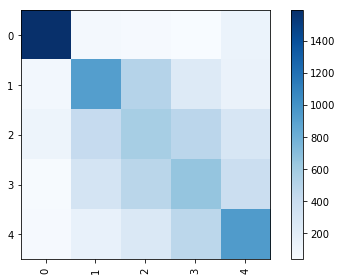

In [89]:
###################         Fig. 1              #######################
###  Overall Confusion Matrix for our model  ####
print("The Confusion matrix (true order vs predicted order) is as follows:")
with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
   
    
    # CREATE THE CONFUSION MATRIX
    cm_dev = create_confusion_matrix(dev_predicted, dev_orders)
    util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")
########################################################################  

In [90]:
#Setup Cell aggregating the errors our model did
Number_of_missclassified_exaples_to_display = 5

with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
    
    #GET THE ERROR EXAMPLES
    errors  = getErrors(data_dev,dev_orders,dev_predicted)

In [91]:
### Setup cells for Figures 2-5
# Get the number of OOV and PAD tokens in each missclassified phrase and display them as histograms
stats = getPADandOOVHistogramsOnErrors(errors,dev_stories)
## Get the histogram of number of OOV and PAD tokens in each phrase for the full dev set
full_devset_stats = getFullPadandOOVHistorgrams(dev_stories)

The histogram of the number of OOV tokens in missclassified phrases:


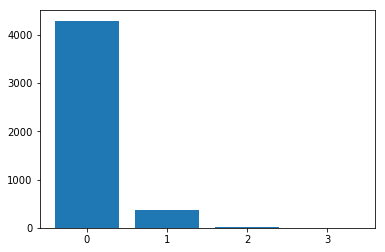

In [92]:
###################         Fig. 2              #######################
print("The histogram of the number of OOV tokens in missclassified phrases:")
plot_histogram(stats,'OOV_hist')
########################################################################

The histogram of the number of OOV tokens in all phrases:


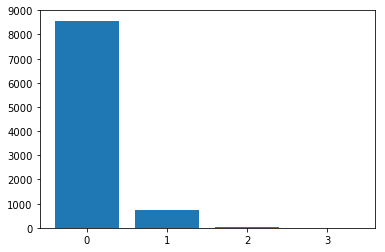

In [93]:
###################         Fig. 3              #######################
print("The histogram of the number of OOV tokens in all phrases:")
plot_histogram(full_devset_stats,'OOV_hist')
#######################################################################


The histogram of the number of padding tokens in missclassified phrases:


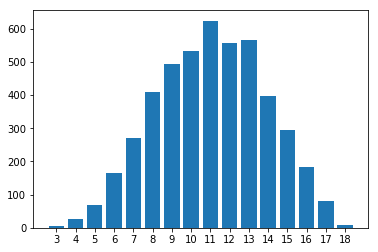

In [94]:
###################         Fig. 4              #######################
print("The histogram of the number of padding tokens in missclassified phrases:")
plot_histogram(stats,'PAD_hist')
#######################################################################

The histogram of the number of padding tokens in all phrases:


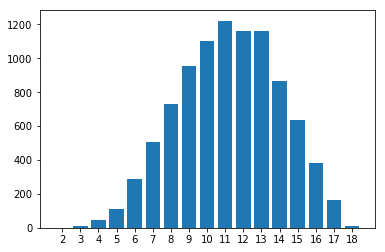

In [95]:
###################         Fig. 5              #######################
print("The histogram of the number of padding tokens in all phrases:")
plot_histogram(full_devset_stats,'PAD_hist')
#######################################################################

Frequency of words in the missclassified phrases


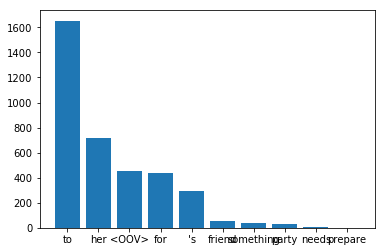

In [96]:
###################         Fig. 6              #######################
#Get the frequency of the words in the missclassified phrases and plot it
word_freq = getErrorWordFrequency(errors,dev_stories,vocab)
print("Frequency of words in the missclassified phrases")
plot_word_histogram(word_freq,10,['<PAD>','.'])
########################################################################

frequency of words in all phrases


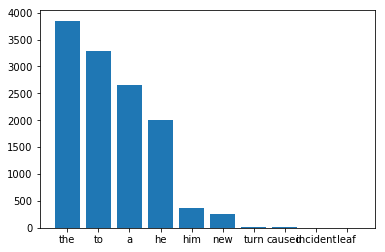

In [97]:
###################         Fig. 7              #######################
#Get the full frequency of words in the dev set and plot it 
norma_freq=getWordFrequency(dev_stories,vocab)
print("frequency of words in all phrases")
plot_word_histogram(norma_freq,10,['<PAD>','.'])
#######################################################################

Ratio of word frequencies missclassified/total


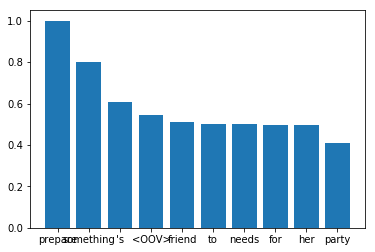

In [98]:
###################         Fig. 8              #######################
#Get the ratio of the number of times a word occurs in missclassified exampled
#vs the total number of times the word appears and plot it
freq_hist = freq_ratios(norma_freq,word_freq)
print("Ratio of word frequencies missclassified/total")
plot_word_histogram(freq_hist,10,['<PAD>','.'])
#######################################################################

In [101]:
# Setup cell for Figs. 9-13
#### GET THE CONFUSION MATRIX FOR EACH SENTENCE SEPARATELY ########
with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
   
    # CREATE THE CONFUSION MATRIX PER SENTENCE
    confusion_per_sentence = []
    for sentence in range(5):
        confusion_per_sentence.append(create_confusion_matrix_for_sentence(dev_predicted, dev_orders,sentence))

The Confusion matrix (true order vs predicted order) for sentence 0 is as follows:


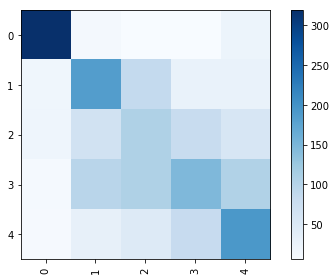

In [102]:
###################         Fig. 9              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 0 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[0],90, outside_label="None")
#######################################################################

The Confusion matrix (true order vs predicted order) for sentence 1 is as follows:


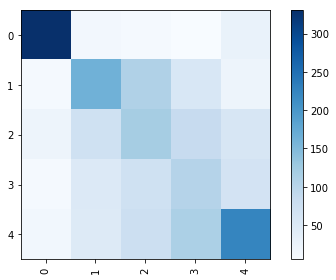

In [103]:
###################         Fig. 10              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 1 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[1],90, outside_label="None")
########################################################################

The Confusion matrix (true order vs predicted order) for sentence 2 is as follows:


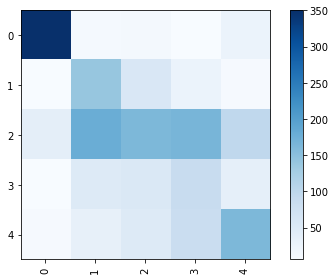

In [104]:
###################         Fig. 11              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 2 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[2],90, outside_label="None")
########################################################################

The Confusion matrix (true order vs predicted order) for sentence 3 is as follows:


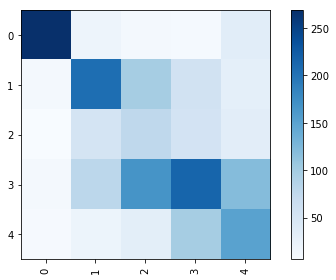

In [105]:
###################         Fig. 12              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 3 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[3],90, outside_label="None")
########################################################################

The Confusion matrix (true order vs predicted order) for sentence 4 is as follows:


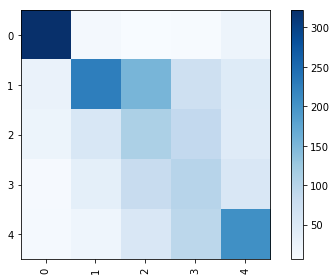

In [106]:
###################         Fig. 13              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 4 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[4],90, outside_label="None")
########################################################################

## <font color='red'>Assessment 2</font>: Assess Description (60 pts) 

We will mark the description along the following dimensions: 

* Clarity (10pts: very clear, 0pts: we can't figure out what you did, or you did nothing)
* Creativity (25pts: we could not have come up with this, 0pts: Use only the provided model)
* Substance (25pts: implemented complex state-of-the-art classifier, compared it to a simpler model, 0pts: Only use what is already there)

## <font color='orange'>Mark</font>:  Your solution to Task 2 is marked with ** __ points**.
---

## <font color='orange'>Final mark</font>: Your solution to Assignment 3 is marked with ** __points**. 